# 1.Understanding the Data:

Import necessary libraries (e.g., pandas, matplotlib, seaborn).<br>
Load the COVID-19 dataset.<br>
Display basic information about the dataset (e.g., data types, missing values).<br>

In [7]:
# load required libraries/modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df=pd.read_csv(r"C:\Users\ADMIN\OneDrive\Documents\Downloads\csv files\covid_19_data.csv")


# Display basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


# 2. Data Cleaning:

In [9]:
Handle missing values.
Convert data types if necessary.
Check for duplicates.

SyntaxError: invalid syntax (4122380074.py, line 1)

In [ ]:
# Handle missing values

for i in df:
    if df[i].dtypes=='object':
        m=df[i].mode()[0]
        df[i]=df[i].fillna(m)

df.isna().sum()
df
# Convert data types if necessary ( ObservationDate    datetime64[ns]) change to datetime
df['ObservationDate']=pd.to_datetime(df['ObservationDate'])
#checking if datatype is changed



# df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Check for duplicates
# print("Number of duplicates:", df.duplicated().sum())
print('Number of duplicates :',df.duplicated().sum())
df['ObservationDate'].dtypes

df.info()

# 3. Descriptive Statistics:

Generate descriptive statistics (mean, median, min, max) for numeric columns.<br>
Explore summary statistics for categorical columns.

In [ ]:
# Descriptive statistics
# df.describe()


# Summary statistics for categorical columns
# seggerate
cat=[]
con=[]
for i in df:
    if df[i].dtypes=='object' :
        cat.append(i)
    else:
        con.append(i)

df.describe()


for i in cat:
    print(df[i].describe())


for i in cat:
    print(df[i].value_counts())

# 4. Time Series Analysis:

Analyze the trends in confirmed, deaths, and recovered cases over time.<br>
Create time-based visualizations.

<Axes: xlabel='ObservationDate', ylabel='Confirmed'>

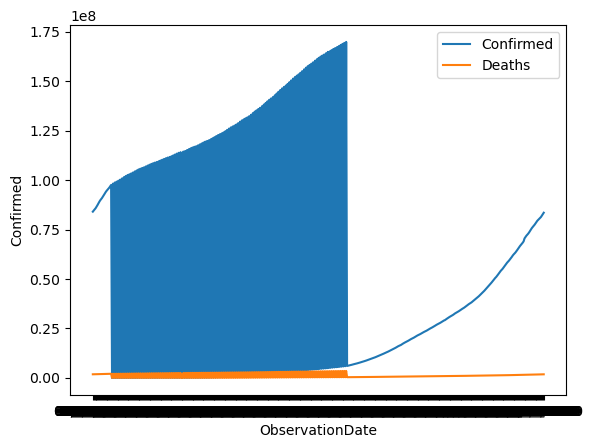

In [22]:
# Time series analysis
# groupby 'ObservationDate' and apply aggregation functions like sum on deaths,confirmed ,recovered 
df_time = df.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})
df_time 
# Plot time series data using line plot

# syntax: 
sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')
sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')




# 5. Geographical Analysis:

<Axes: xlabel='Country/Region', ylabel='Confirmed'>

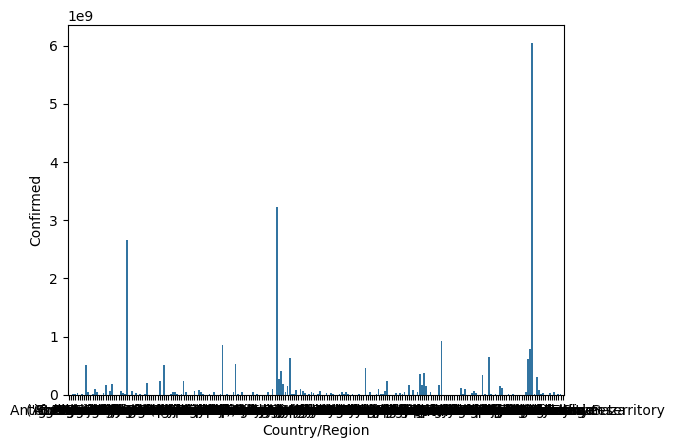

In [26]:
# Geographical analysis
df_country = df.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

# Plot geographical data
sns.barplot(x=df_country.index, y='Confirmed', data=df_country)



# 6. Correlation Analysis:

Examine the correlation between different numeric variables.

In [ ]:
# Correlation analysis between confirmed,deaths and recovered

# Plot correlation on heat map
df.columns
abc=df[['Confirmed', 'Deaths', 'Recovered']].corr()
sns.heatmap(abc,annot=True,cmap='viridis')

# 7. Advanced Analysis:

Explore advanced visualizations or statistical tests based on the specific questions you want to answer.

In [ ]:
# Calculate the total number of confirmed cases, deaths, and recoveries for each country/region.

total_confirmed=df['Confirmed'].groupby(by=df['Country/Region']).sum()
total_recovered=df['Recovered'].groupby(by=df['Country/Region']).sum()
total_deaths=df['Deaths'].groupby(by=df['Country/Region']).sum()


In [30]:
# Identify the countries/regions with the highest number of confirmed cases, deaths, and recoveries.
a=df.groupby('Country/Region').agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})
ab=a.sort_values(by='Confirmed',ascending=False)
bc=a.sort_values(by='Deaths',ascending=False)
cd=a.sort_values(by='Recovered',ascending=False)
ab.head(1)#highestnoofconfirmed
bc.head(1)#highestnoofdeaths
cd.head(1)#highestnoofrecovered

,Confirmed,Deaths,Recovered
Country/Region,,,
India,3.226768e+09,44424723.0,2.900590e+09


In [ ]:
# Visualize the distribution of deaths using bar chart
plt.hist(df['Deaths'],bins=10)
plt.title('Distribution Of Deaths')
plt.ylabel('Frequency')
plt.show()

# or

df['Deaths'].value_counts().plot(kind='hist')
